# Baesyan Data Analysis Course - Chapter 2 Exercises
https://github.com/avehtari/BDA_course_Aalto/tree/master/exercises

### Exercise 1
Algae status is monitored in 274 sites at Finnish lakes and rivers.
The observations for the 2008 algae status at each site are presented
in file *algae.txt* ('0': no algae, '1': algae present).

 In the year 2008 blue-green algae was observed at 44 sites.
Let $\pi$ be the probability of a monitoring site having detectable
blue-green algae levels and $y$ the observations in *algae*.
Use a binomial likelihood for the observations $y$ and a $Beta(2,10)$ prior
for $\pi$ to formulate a Bayesian model.
Here it is not necessary to derive the posterior distribution for $\pi$ as it has already been done in the book.
Also, it is not necessary to write out the distributions; it is sufficient to use label-parameter format, e.g. $Beta(\cdot,\cdot)$.

Your task is to formulate a Bayesian model and answer questions based on it:

### 1. Formulate (1) model likelihood $p(y|\pi)$, (2) the prior $p(\pi)$, and (3) the resulting posterior $p(\pi|y)$.
Report the posterior in the format $Beta(\cdot,\cdot)$, where you replace
$\cdot$'s with the correct numerical values.

**Answer:** A binomial likelihood for $y$ given $\pi$ is $p(y|\pi) = Binomial(\pi, 274)$. The prior for $\pi$ is $Beta(2, 10)$, this yields the following posterior:

$$p(\pi|y) = Beta(2+y, 284-y).$$

Loading the data to get the value for y:

y = 44
The posterior distribution p(π|y) is Beta(46, 240).


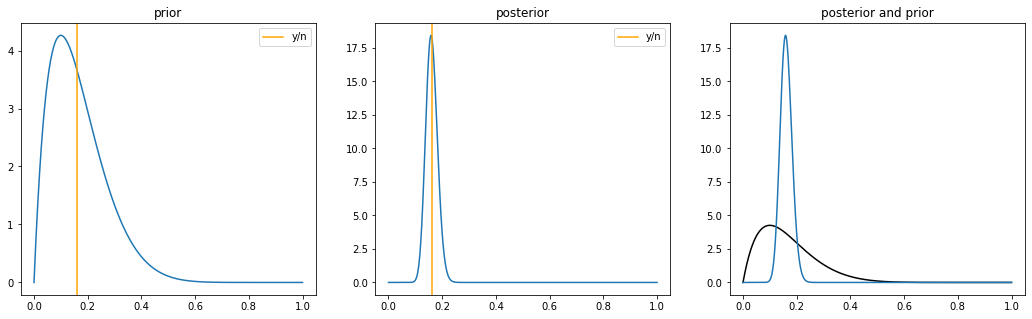

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

data = pd.read_csv('Data//algae.txt', sep=" ", header=None)
y = sum(data[0])
α, β = 2+y, 284-y
print("y =", y)
print("The posterior distribution p(π|y) is Beta("+str(2+y) + ", "+str(284-y)+").")

# plotting prior, likelihood and posterior
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
n = int(1e3)
x = np.linspace(0, 1, n)
prior = beta.pdf(x, 2, 10)
po = beta.pdf(x, α, β)
axes[0].plot(x, prior)
axes[0].set_title("prior")
axes[1].plot(x, po)
axes[1].set_title("posterior")

for i in range(2):
    axes[i].axvline(y/len(data[0]), 0, 1, label='y/n', color = 'orange')
    axes[i].legend()
    
axes[2].plot(x, prior, color = 'black')
axes[2].plot(x, po)
axes[2].set_title("posterior and prior")

plt.show()

### 2. What can you say about the value of the unknown $\pi$ according
to the observations and your prior knowledge? Summarize your results
with a point estimate (i.e. $E(\pi|y)$) and a 90\% posterior interval. **Note!** Posterior intervals are also called credible intervals and are different from confidence intervals. Report the values using the data *algae*, not *algae\_test*.


**Answer:** The mean can be computed analytic, as the mean for a Beta(a, b) distribution is a/(a+b).
 The $90\%$ posterior interval can be calculated using scipy buid in function, or with simulations.

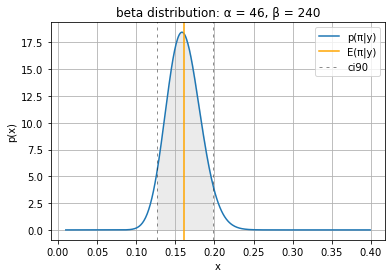

posterior mean E(π, y) = 0.1608 
90% credible interval: [0.1266 0.1978]


In [6]:
# define plot function with vertical line for mean
def plot_beta(α, β, xlim, plot_ci = False):
    grid_size = 1e3
    x_grid = np.arange(xlim[0], xlim[1], 1/grid_size)
    beta_grid = beta.pdf(x_grid, α, β)

    # plot
    fig, ax = plt.subplots()
    # density
    ax.plot(x_grid, beta_grid, label='p(π|y)')
    # mean
    post_mean = α/(α + β)
    ax.axvline(post_mean, 0, max(beta_grid), label='E(π|y)', color = 'orange')
    # 90% centered interval
    if plot_ci:
        ci_bounds = [beta.ppf(0.05, α, β), beta.ppf(0.95, α, β)]
        ci90 = (x_grid > ci_bounds[0]) & (x_grid < ci_bounds[1])
        plt.fill_between(x_grid[ci90], beta_grid[ci90], color='0.92')
        ax.axvline(ci_bounds[0], 0, max(beta_grid), label='ci90', color = '0.1', linewidth = 0.5, dashes=(6, 8))
        ax.axvline(ci_bounds[1], 0, max(beta_grid), color = '0.1', linewidth = 0.5, dashes=(6, 8))

    
    ax.set(xlabel = "x", ylabel = "p(x)", title = "beta distribution: α = " + str(α) + ", β = " + str(β))
    ax.legend()
    ax.grid()
    plt.show()
    return post_mean, ci_bounds

post_mean, ci_bounds = plot_beta(α, β, xlim = [0.01,0.4], plot_ci = True)

print("posterior mean E(π, y) =", np.round(post_mean, 4), "\n90% credible interval:", np.round(ci_bounds, 4))

* What is the probability that the proportion of monitoring sites with detectable algae levels $\pi$ is smaller than $\pi_0=0.2$ that is known from historical records?

In [7]:
print("the probability is p(π<0.2|y) = " + str(round(beta.cdf(0.2, α, β),4)*100) + "%")

the probability is p(π<0.2|y) = 95.86%


### 3. What assumptions are required in order to use this kind of a
  model with this type of data?
  
**Answer:** The model assumes exchengeability. Also, the posterior distribution $p(\pi|y)$ is given for all the monitoring areas, without considering any particular characteristic of a given site.

### 4. Make prior sensitivity analysis by testing a couple of different reasonable priors and plot the different posteriors. Summarize the results by one or two sentences.

**Answer:** Other reasonable prior to try:

* uniform [0, 1], iet prior Beta(1, 1) - uninformative prior
* non-conjugated prior, lenearly increasing until 0.2, and linearly decreasing from 0.2 ultil 0.4, than linearly decreasing from 0.4 to 1 with p(1) = 0 - weakly informative prior (or is it?)
* a highly informative prior: Beta(31.8, 127.2)

While getting posterior estimation for the Beta priors is straigh foward from the first considered prior (which is also beta), the non-conjugated prior is trickier. First, let's solve this trickiest problem, than all the priors and posteriors can be plotted together for comparison.

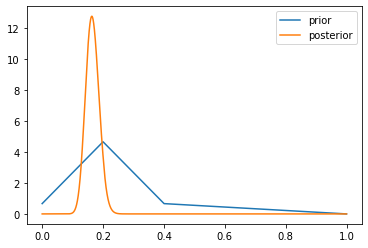

In [30]:
from scipy.stats import binom
n = int(1e4)
x = np.linspace(0, 1, n)

# non conjugated prior
increasing = (x<=0.2)
decreasing = (x > 0.2) & (x <= 0.4)
decreasing2 = (x > 0.4)
ncprior = np.ones(n)
ncprior[increasing] = 20*x[increasing] + 2/3
ncprior[decreasing] = -20*x[decreasing] + 26/3
ncprior[decreasing2] = -10/9*x[decreasing2] + 10/9
ncprior = ncprior

# resulting posterior
likelihood = [binom.pmf(y, len(data[0]), p) for p in x]
ncpo = ncprior*likelihood
# old wrong (?) likelihoog beta.pdf(x, y+1, len(data[0])+1)
ncpo = 50*ncpo # how to correctly normalize?

# initial plot (unormalized)
fig, ax = plt.subplots()
pprior, = ax.plot(x, ncprior)
ppo, = ax.plot(x, ncpo)

plt.legend(
    (pprior, ppo),
    ("prior", "posterior"))
plt.show()

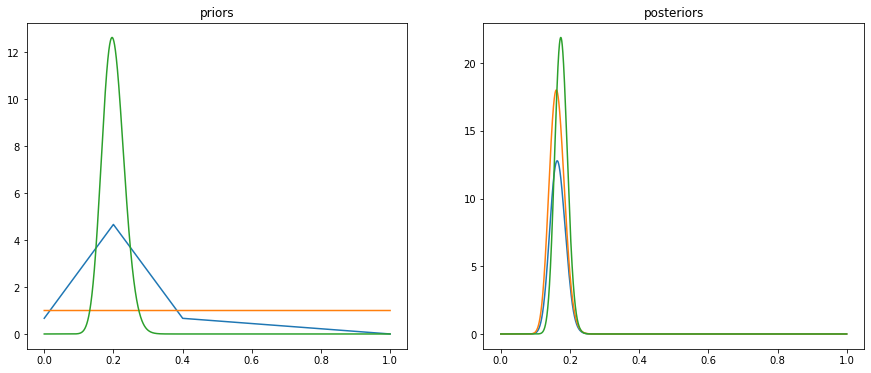

In [31]:
# prior and posterior with different beta priors:
uniprior = beta.pdf(x, 1, 1)
infoprior = beta.pdf(x, 31.8, 127.2)
unipo = beta.pdf(x, 1+y, 1+274-y)
infopo = beta.pdf(x, 31.8+y, 127.2+274-y)
priors = [ncprior, uniprior, infoprior]
posteriors = [ncpo, unipo, infopo]

# plotting
xlim = [0, 1]
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 6))

for prior in priors:
    axes[0].plot(x[(x<xlim[1]) & (x>xlim[0])], prior[(x<xlim[1])& (x>xlim[0])])
for posterior in posteriors:
    axes[1]. plot(x[(x<xlim[1]) & (x>xlim[0])], posterior[(x<xlim[1])& (x>xlim[0])])
    
axes[0].set_title("priors")
axes[1].set_title("posteriors")
plt.show()

The weakly informative prior concentrates mass around the historical records for $\pi$, but it is not too restrictive. The highly informative prior $Beta(31.8, 127.2)$ really pulls the data twards it's mean, $0.2$, not giving too much weight to the information contained in the data. The uniform prior is not too great either, since it gives the same probability to $\pi$ close to 1 as to $pi$ close to 0.2, and this also "pulls the posterior" to the right

### Exercise 2.13: Falta accidents deaths on schedualed ariline flights (Poisson model)
Consider the following dataset:

In [4]:
import pandas as pd
from scipy.stats import gamma, poisson
d = {'year':[i for i in range(1976, 1986)], 'fatal_accidents':[24,25,31,31,22,21,26,20,16,22],
    'n_deaths':[734,516,754,877,814,362,764,809,223,1066], 'death_rate':[0.19,0.12,0.15,0.16,0.14,0.06,0.13,0.13,0.03,0.15]}
df = pd.DataFrame(data = d)
df

,year,fatal_accidents,n_deaths,death_rate
0,1976,24,734,0.19
1,1977,25,516,0.12
2,1978,31,754,0.15
3,1979,31,877,0.16
4,1980,22,814,0.14
5,1981,21,362,0.06
6,1982,26,764,0.13
7,1983,20,809,0.13
8,1984,16,223,0.03
9,1985,22,1066,0.15


**a.1)** Assume that the numbers of fatal accidents in each year are independent with a $Poisson(\theta)$ distribution. Set a prior distribution for $\theta$ and determine the posterior dsitribution based on the data from 1976 through 1985.

**Answer:** Conjugated prior will be of the form $Gamma(\alpha, \beta)$. One way is to set $\alpha = \beta = \epsilon \simeq 0$, and consider the posterior as $Gamma(\sum y_t, T)$, where $y_t$ is the number of fatal accidents in year $t$, and $T$ is the number of years in the sample, i.e.:

p(θ|y) ~ Gamma(238, 10)


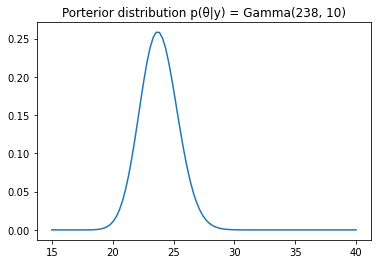

In [141]:
α = sum(df['fatal_accidents'])
β =  df.shape[0]
print("p(θ|y) ~ Gamma("+str(α)+", "+str(β)+")")

# plotting the posteiors
fig, ax = plt.subplots()
x = np.linspace(15, 40, 100)
ax.plot(x, gamma.pdf(x, a = α, scale = 1/β))
ax.set_title("Porterior distribution p(θ|y) = Gamma("+str(α)+", "+str(β)+")")

plt.show()       

**a.2)** Under this model, give a $95\%$ predictive interval for the number of fatal accidents in 1986. You can use the normal approximation to the gamma and Poisson or cumpute using simulation.

**Answer:** Computing using simulation: $\hat{y}$ is a draw from the predictive distribution, $p(\hat{y}|y)$. We exclude from these simulations the smallar and higher values.
    
Repeat n times {
* draw $\theta_i$ from $p(\theta|y)$
* draw $\hat{y}$ from $Poisson(\theta_i)$

In [176]:
n = 1000
thetas = [gamma.rvs(a = α, scale = 1/β) for i in range(n)]
y1986 = [poisson.rvs(theta) for theta in thetas]
y1986_95ci = np.sort(y1986)[[int(0.025*1000-1),int(0.975*1000)]]
print("the 95% predictive interval for the n. of fatal accidents in 1986 is", y1986_95ci)

the 95% predictive interval for the n. of fatal accidents in 1986 is [0 0]


**b)** Do the same as in **a)**, but with and exposure in each year proportional to the number of passenger miles flown (passenger miles flows = 100.000.000 x death/death_rate), assuming that exposure in 1986 is $8 \times 10^{11}$.

**Answer:** Considering the same prior for $\theta$, i.e., $p(\theta) = Gamma(\epsilon, \epsilon)$. Let $E_t$ be the exposure at year $t$. The posterior distribution is

$$p(\theta|y, E) = Gamma(\sum_{t = 1976}^{1985} y_t, \sum_{t = 1976}^{1985} E_t)$$

In [178]:
df['exposure'] = 1e8*df["n_deaths"]/df["death_rate"]
α = sum(df['fatal_accidents'])
β = sum(df['exposure'])

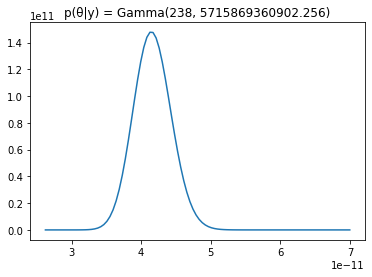

In [179]:
# plotting the posteiors
fig, ax = plt.subplots()
x = np.linspace(15, 40, 100)/np.mean(df['exposure'])
ax.plot(x, gamma.pdf(x, a = α, scale = 1/β))
ax.set_title("p(θ|y) = Gamma("+str(α)+", "+str(β)+")")

plt.show()    

Computing $\hat{y}$  using simulation:
    
Repeat n times {
* draw $\theta_i$ from $p(\theta|y)$
* draw $\hat{y}$ from $Poisson(E_{1986}\theta_i)$

In [180]:
n = 1000
thetas = [gamma.rvs(a = α, scale = 1/β) for i in range(n)]
y1986 = [poisson.rvs(8e11*theta) for theta in thetas]
y1986_95ci = np.sort(y1986)[[int(0.025*1000-1),int(0.975*1000)]]
print("the 95% predictive interval for the n. of fatal accidents in 1986 is", y1986_95ci)

the 95% predictive interval for the n. of fatal accidents in 1986 is [22 47]


**c)** Repeat **a)**, but with 'passenger deaths' as $y$

p(θ|y) ~ Gamma(6919, 10)


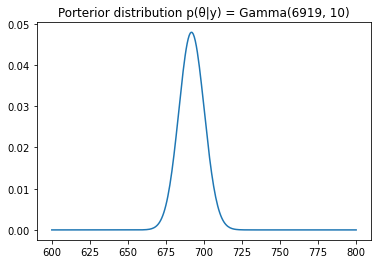

the 95% predictive interval for the n. of fatal accidents in 1986 is [640 749]


In [183]:
α = sum(df['n_deaths'])
β =  df.shape[0]
print("p(θ|y) ~ Gamma("+str(α)+", "+str(β)+")")

# plotting the posteiors
fig, ax = plt.subplots()
x = np.linspace(600, 800, 300)
ax.plot(x, gamma.pdf(x, a = α, scale = 1/β))
ax.set_title("Porterior distribution p(θ|y) = Gamma("+str(α)+", "+str(β)+")")
plt.show()

# 95% predictive interval
n = 1000
thetas = [gamma.rvs(a = α, scale = 1/β) for i in range(n)]
y1986 = [poisson.rvs(theta) for theta in thetas]
y1986_95ci = np.sort(y1986)[[int(0.025*1000-1),int(0.975*1000)]]
print("the 95% predictive interval for the n. of fatal accidents in 1986 is", y1986_95ci)

**d)** Repeat **b)**, but with 'passenger deaths' as $y$

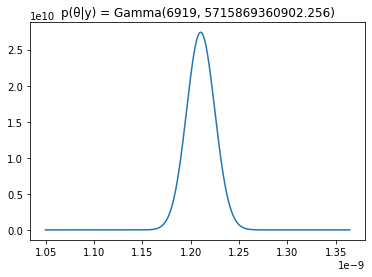

the 95% predictive interval for the n. of fatal accidents in 1986 is [ 903 1035]


In [189]:
α = sum(df['n_deaths'])
β = sum(df['exposure'])

# plotting the posteiors
fig, ax = plt.subplots()
x = np.linspace(600, 780, 1000)/np.mean(df['exposure'])
ax.plot(x, gamma.pdf(x, a = α, scale = 1/β))
ax.set_title("p(θ|y) = Gamma("+str(α)+", "+str(β)+")")

plt.show() 
n = 1000
thetas = [gamma.rvs(a = α, scale = 1/β) for i in range(n)]
y1986 = [poisson.rvs(8e11*theta) for theta in thetas]
y1986_95ci = np.sort(y1986)[[int(0.025*1000-1),int(0.975*1000)]]
print("the 95% predictive interval for the n. of fatal accidents in 1986 is", y1986_95ci)

**e)** In which of the cases above does the Poisson model seem more or less reasonable? Why? Discuss based on general principles, without specific reference to the numbers in table 2.2.

**Answer:** The models which includes overdispersion are intuitible reasonable, given that the more flights in place, the more fatal accidents may occour. But as time goes by, both technology and miles goes up (model for trend may be adequate). On the other hand, the Poisson models above seem more reasonable to number of accidents, because number of deaths depends on the number of passenger in the fatal crashers, so they are clustered (Poisson distribution assumes independe - while number of crashes are independent, the number of deaths are not, since they happen in the same accident).

### Exercise 2.14: Algebra of the normal model
**a)** Consider $y$, a single scalar observation from a normal distribution, with unkown mean $\mu$ and known variance $\sigma^2$. So

$$p(y|\theta) \propto exp\left(-\frac{1}{2\sigma^2}(y-\theta)^2\right),$$

and a parametrization of a conjugated prior density is $\theta \sim N(\mu_0, \tau_0^2)$, so:

$$p(\theta) \propto exp\left(-\frac{1}{2\tau_0^2}(\theta - \mu_0)^2\right).$$


This yields the posterior density

$$p(\theta|y) \propto exp\left(\frac{-1}{2}\left(\frac{(y-\theta)^2}{\sigma^2} + \frac{(\theta - \mu_0)^2}{\tau_0^2}\right)\right)$$

which can be shown to be normal distribution $N(\mu_i, \tau_1^2)$ where 


\begin{array}
    $\mu_1 = \dfrac{\dfrac{y}{\sigma^2} + \dfrac{\mu_0}{\tau_0^2}}{\dfrac{1}{\sigma^2} + \dfrac{1}{\tau_0^2}}; & \dfrac{1}{\tau_1^2} = \dfrac{1}{\sigma^2} + \dfrac{1}{\tau_0^2}
\end{array}

in fact, note that:

\begin{array}
$ \dfrac{1}{\tau_1^2} = \dfrac{1}{\sigma^2} + \dfrac{1}{\tau_0^2} = \dfrac{\tau_0^2 + \sigma^2}{\tau_0^2\sigma^2}; & \mu_1 = \dfrac{\dfrac{y}{\sigma^2} + \dfrac{\mu_0}{\tau_0^2}}{\dfrac{1}{\sigma^2} + \dfrac{1}{\tau_0^2}} = \dfrac{\sigma^2\mu_0 + \tau_0^2y}{\sigma^2 + \tau_0^2}
\end{array}

Define as $A(\theta)$ the term inside the posterior, which is a function of $\theta$:

\begin{array}
$A(\theta) &= \left(\dfrac{(y-\theta)^2}{\sigma^2} + \dfrac{(\theta - \mu_0)^2}{\tau_0^2}\right) &= \dfrac{(y-\theta)^2\tau_0^2 + (\theta - \mu_0)^2\sigma^2}{\sigma^2\tau_0^2}\\
&& =\dfrac{(y^2\tau_0^2 + \mu_0^2\sigma^2) - 2\theta(y\tau_0^2 + \mu_0\sigma^2) + \theta^2(\tau_0^2 + \sigma^2)}{\sigma^2\tau_0^2}\\
&& = \dfrac{\tau_0^2 + \sigma^2}{\tau_0^2\sigma^2}  \left[\theta^2- 2\theta\dfrac{y\tau_0^2 + \mu_0\sigma^2}{\tau_0^2 + \sigma^2} + \dfrac{y^2\tau_0^2 + \mu_0^2\sigma^2}{\tau_0^2 + \sigma^2}\right] \\
&& = \dfrac{1}{\tau_1^2}\left[\theta^2 - 2\theta\mu_1 + \dfrac{y^2\tau_0^2 + \mu_0^2\sigma^2}{\tau_0^2 + \sigma^2}\right]
\end{array}

So

$$p(\theta|y) \propto exp\left(-\dfrac{1}{2}A(\theta)\right)$$

Consider the constant $B$ ( constant since the posterior $p(\theta|y)$ depends only on $y$, and we assume the hyperparameters are known):

$$B = exp\left(-\dfrac{1}{2\tau_1^2}\left(\mu_1^2 - \dfrac{y^2\tau_0^2 + \mu_0^2\sigma^2}{\tau_0^2 + \sigma^2}\right)\right)$$

Since B does not depend on $\theta$, it follows that

\begin{array}
$ p(\theta|y) & \propto B \times exp\left(-\dfrac{1}{2}A(\theta)\right) \\
& = exp\left(\dfrac{1}{\tau_1^2} (\theta^2 - 2\theta\mu_1 + \mu_1^2)\right) \\
& = exp\left(\dfrac{1}{\tau_1^2} (\theta - \mu_1)^2\right)
\end{array}
